# Préparation

In [1]:
import folium
import geopandas
from folium import plugins
import os
import webbrowser
from urllib.request import pathname2url  #pathname2url converts the html file into URL for then being opened into the bro@wser
import json
import random
from folium.features import GeoJson, GeoJsonTooltip #Google Earth Engine library
from datetime import datetime

import matplotlib.pyplot as plt 


## variables d'environnement ou de répertoire

In [3]:
# Créer un répertoire de données et y ranger les différents fichiers que vous pouvez
# employer, au format GeoJson de préférence.
# Declare folder destination
data_folder = r'./Shp/doc'
resultats = r'./Shp/resultats'
#navigateur = webbrowser.get('Chrome')

# 1) La carte de départ

In [31]:
# m = folium.Map(
#         # On se propose de travailler sur une zone particulière dans le delta du Mekong autour de
#         # la ville de Sadek
#         # define  center coordinates lat = 10.46078, lon = 105.60127
#         [10.46078, 105.60127],
#         tiles= 'openstreetmap',
#         zoom_start=7,
#     )

# # Quelques systèmes de tuiles auxquels on peut faire appel avec folium.
# folium.TileLayer('openstreetmap').add_to(m)
# folium.TileLayer('cartodbpositron').add_to(m)
# folium.TileLayer('stamen terrain').add_to(m)



In [32]:
# Ajout du contrôle des couches
#folium.LayerControl().add_to(m)

In [33]:
#m

# 2) gestion de données

## inclusion shp

In [11]:
import os
import geopandas
pathDir = "r'.\Shp\doc"
fileName1 = "Hoa Hao.shp"
df_HoaHao = geopandas.read_file(os.path.join(pathDir, fileName1))
fileName2 = "Fleuves.shp"
df_Fleuves = geopandas.read_file(os.path.join(pathDir, fileName2))
fileName3 = "Chef de Lieu.shp"
df_cheflieu = geopandas.read_file(os.path.join(pathDir, fileName3))
fileName4 = "Khuyen Nong.shp"
df_khuyennong = geopandas.read_file(os.path.join(pathDir, fileName4))
fileName5 = "Kinh Ly.shp"
df_kinhly = geopandas.read_file(os.path.join(pathDir, fileName5))

DriverError: r'.\Shp\doc\Hoa Hao.shp: No such file or directory

In [ ]:
#df_HoaHao.shape
#print(df_HoaHao)

In [ ]:
df_HoaHao = df_HoaHao.to_crs(epsg=4326) 
print(df_HoaHao.crs)  
df_HoaHao

epsg:4326


,Nom,geometry
0,Bagamo,"POLYGON Z ((106.13336 10.57000 0.00000, 106.21..."
1,Le Quang Vinh,"POLYGON Z ((106.00073 10.55144 0.00000, 106.05..."
2,Tran Van Loai,"POLYGON Z ((105.32847 10.45605 0.00000, 105.34..."
3,Le Quang Vinh,"POLYGON Z ((105.50035 10.28647 0.00000, 105.51..."
4,Tran Van Loai,"POLYGON Z ((105.38617 10.58479 0.00000, 105.39..."
5,Nguyen Gia Ngo,"POLYGON Z ((105.38617 10.58479 0.00000, 105.39..."
6,Lam Thanh Nguyen,"POLYGON Z ((105.26884 10.79790 0.00000, 105.26..."
7,Tran Van Loai,"POLYGON Z ((105.26884 10.79790 0.00000, 105.27..."
8,Tran Van Loai,"POLYGON Z ((105.94532 10.47872 0.00000, 105.94..."


In [ ]:
import matplotlib.pyplot as plt

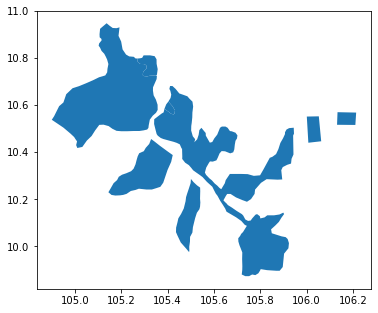

In [ ]:
df_HoaHao.plot(figsize=(6, 6))
plt.show()

## Chef Lieu

In [ ]:
df_cheflieu.head()

,Nom,geometry
0,Soc Trang,POINT Z (105.95203 9.58648 0.00000)
1,Vinh Chau,POINT Z (105.90412 9.31387 0.00000)
2,Bac Lieu,POINT Z (105.69748 9.27939 0.00000)
3,Vinh Loi,POINT Z (105.47415 9.20699 0.00000)
4,Gia Rai,POINT Z (105.31937 9.17328 0.00000)


In [ ]:
#import matplotlib.pyplot as plt
#df_cheflieu.plot(figsize=(10, 10))
#plt.show()

In [ ]:
df_cheflieu.to_file('df_cheflieu.geojson', driver='GeoJSON')  

In [ ]:
df_cheflieu2 = geopandas.read_file('df_cheflieu_new.geojson')

In [ ]:
df_cheflieu2.head()

,Nom,geometry
0,Soc Trang,POINT Z (105.95203 9.58648 0.00000)
1,Bac Lieu,POINT Z (105.69748 9.27939 0.00000)
2,Ca Mau,POINT Z (105.10462 9.15678 0.00000)
3,Phung Hiep,POINT Z (105.79396 9.78893 0.00000)
4,Tra On,POINT Z (105.90878 9.98814 0.00000)


In [ ]:
town_data = [[point.xy[1][0], point.xy[0][0]] for point in df_cheflieu.geometry ]
town_data


[[9.58648, 105.952034],
 [9.313869, 105.904123],
 [9.279391, 105.69748],
 [9.206995, 105.474151],
 [9.173277, 105.319366],
 [9.156781, 105.104623],
 [9.78893, 105.793962],
 [9.814332, 105.938995],
 [9.775832, 105.297689],
 [9.873561, 105.153755],
 [9.926466, 105.703056],
 [10.027339, 105.713855],
 [9.988139, 105.908785],
 [10.097607, 105.585512],
 [10.067539, 105.463664],
 [10.017179, 105.055256],
 [10.123966, 105.255427],
 [10.305355, 105.275551],
 [10.302356, 105.769613],
 [10.455307, 105.624743],
 [10.252328, 105.530541],
 [10.380422, 105.421641],
 [10.343386, 105.332845],
 [10.619335, 105.430963],
 [10.595246, 105.213401],
 [10.22675, 104.597623],
 [10.381404, 104.499455],
 [10.131424, 105.171852],
 [10.788378, 105.241652],
 [10.806594, 105.361417],
 [10.574243, 105.341493],
 [10.430005, 105.380364],
 [10.244341, 105.971755],
 [10.053635, 105.997139],
 [10.048815, 105.747327],
 [10.378506, 106.043594],
 [10.367984, 106.36681],
 [10.242686, 106.391562],
 [9.95413, 106.286155],
 [9.9

In [ ]:
m_CL = folium.Map(
        # On se propose de travailler sur une zone particulière dans le delta du Mekong autour de
        # la ville de Sadek
        # define  center coordinates lat = 10.46078, lon = 105.60127
        [10.46078, 105.60127],
        tiles= 'stamen watercolor',
        zoom_start=9,
    )


folium.Marker(location = [lat, long],
                   popup=row['Nom'],
                  #icon=folium.Icon(icon='magnet', prefix='fa', color='red'),
                   icon=folium.DivIcon(html=f"""<div style="font-family: Times New Roman;  font-size: 12pt; color: blue"> {row['Nom']}
                   <svg> <circle cx="0" cy="0" r="5" fill="#0000ff" opacity=".9"/> </svg>   
                    </div>""",
                     icon_size=(100,30),
                     icon_anchor= (10,0)
                 )

In [ ]:
m_CL

In [ ]:
for index, row in df_cheflieu.iterrows():
    #print( index, row['Nom'], row['geometry'].simplify(tolerance=0.001))
    #print( row['geometry'].simplify(tolerance=0.001).x, row['geometry'].simplify(tolerance=0.001).y )
    lat = row['geometry'].simplify(tolerance=0.001).y
    long = row['geometry'].simplify(tolerance=0.001).x
    print(row['Nom'])
    folium.Marker(location = [lat, long],
                   popup=row['Nom'],
                   #icon=folium.Icon(icon='magnet', prefix='fa', color='red'),
                   icon=folium.DivIcon(html=f"""<div style="font-family: Arial;  font-size: 12pt; color: blue"> {row['Nom']}
                                       <circle cx="50" cy="50" r="40" fill="#69b3a2" opacity=".4"/>
                    </div>""",
                     icon_size=(100,30),
                     icon_anchor= (-5,20)
                 )

                  ).add_to(m_CL) 

Soc Trang
Vinh Chau
Bac Lieu
Vinh Loi
Gia Rai
Ca Mau
Phung Hiep
Bai Xao
Vi Thanh
Giong Rieng
Cai Tac
Cai Rang
Tra On
O Mon
Co Do
Rach Gia
Cai San
Nui Sap
Sa Dec
Cao Lanh
Thot Not
Long Xuyen
Vinh Trach
Doc Vang
Cai Dau
Ba Hon
Ha Tien
Tan Hoi
Tan Chau
Hong Ngu
Hoa Hao
Nang Ga
Vinh Long
Tam Binh
Can Tho
Cai Lay
My Tho
Ben Tre
Cang Long
Tra Vinh
Tan An
Sai Gon
Chau Doc
1
2
3
4
5
6
7
8
9
10


In [ ]:
for _, r in df_khuyennong.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {
                                "stroke-width":"13",
                                'color' : "#ff0000",
                                'fillOpacity' : 0.7
                                }
                           )
    geo_j.add_to(m_CL)

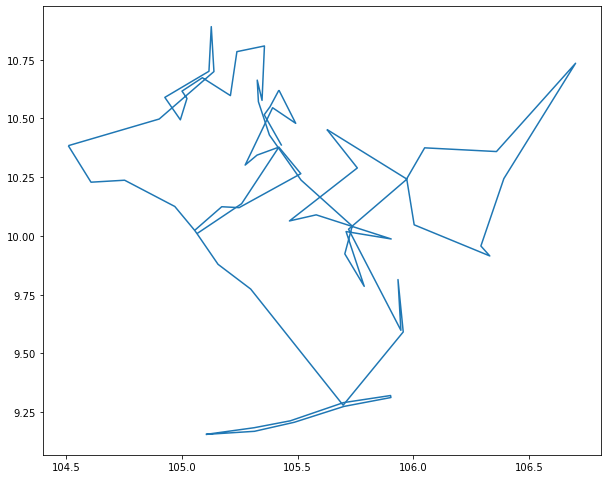

In [ ]:
df_khuyennong.plot(figsize=(10,10))
plt.show()

In [ ]:
m_CL.save("carte_khuyennong_vf1.html")

for index , r in df_cheflieu.iterrows():
    # Sans simplifier la représentation de chaque ville, la carte pourrait ne pas être affichée
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    print(sim_geo)
    geo_j = sim_geo.to_json()
    print(geo_j)
    geo_j = folium.GeoJson( data=geo_j,
                            #
                            style_function=lambda x: {
                               'fillColor': 'blue',
                                'color' : "#ff0000",
                                'fillOpacity' : 0.7}
                           )
    #print(geo_j)
    folium.Tooltip(r['Nom']).add_to(geo_j)

    # on ajoute l'objet geojson à la carte
    geo_j.add_to(m_CL)

In [ ]:
for _, r in df_kinhly.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {
                               'fillColor': 'black',
                                'color' : "#00ff",
                                'fillOpacity' : 0.7}
                           )
    geo_j.add_to(m_CL)

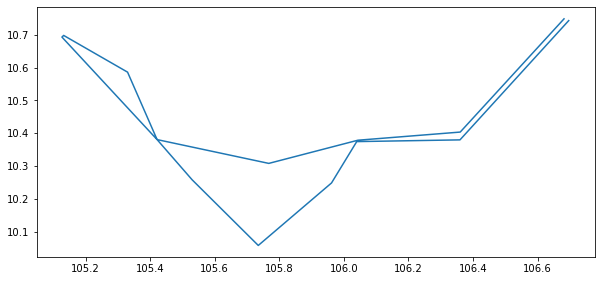

In [ ]:
df_kinhly.plot(figsize=(10,10))
plt.show()

In [ ]:
m_CL

In [ ]:
m_CL.save("carteDesVilles.html")

In [ ]:
#!pip install selenium

In [ ]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
options = Options()
options.add_argument("--window-size=5000x4000")
options.add_argument("--verbose")

#options.headless = True
driver = webdriver.Chrome("/usr/local/bin/chromedriver", options=options)

# si on veut mettre l'option en dehors
#driver.set_window_size(4000, 3000)  # choose a resolution

#driver.get("file:///Users/mb/Dropbox%20(VIETNAMICA)/VNCA_cartes_Pascal/periples.html")
driver.get("file:///Users/mb/Dropbox%20(VIETNAMICA)/VNCA_cartes_Pascal/carteDesVilles.html")

# You may need to add time.sleep(seconds) here
time.sleep(5)
driver.save_screenshot('screenshot11.png')

/var/folders/_h/qq8_gdy13bg7ctchc1r_dptr0000gn/T/ipykernel_73071/838102976.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/local/bin/chromedriver", options=options)


True

In [ ]:
df_kinhly.plot(figsize=(10,10))

In [ ]:
m_CL = folium.Map(
        # On se propose de travailler sur une zone particulière dans le delta du Mekong autour de
        # la ville de Sadek
        # define  center coordinates lat = 10.46078, lon = 105.60127
        [10.46078, 105.60127],
        tiles= 'cartodbpositron',
        zoom_start=13,
    )

# Quelques systèmes de tuiles auxquels on peut faire appel avec folium.
#folium.TileLayer('cartodbpositron').add_to(m2)
#folium.TileLayer('stamen terrain').add_to(m2)


In [ ]:
df = df_HoaHao

In [ ]:
df

In [ ]:
m2

In [ ]:
m_CL

In [ ]:
m_CL.save("periples.html")

#### création de la polyline

In [ ]:
wind_locations2 = []
for index, row in df_cheflieu.iterrows():
    #print( index, row['Nom'], row['geometry'].simplify(tolerance=0.001))
    #print( row['geometry'].simplify(tolerance=0.001).x, row['geometry'].simplify(tolerance=0.001).y )
    lat = row['geometry'].simplify(tolerance=0.001).y
    long = row['geometry'].simplify(tolerance=0.001).x
    wind_locations2.append([lat, long])

In [ ]:
wind_locations2

In [ ]:
from folium import plugins
#for _, r in df_khuyennong.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    #sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    

wind_line = folium.PolyLine(wind_locations2, weight=15, color="#8EE9FF").add_to(m_CL)

attr = {"fill": "#007DEF", "font-weight": "bold", "font-size": "24"}

plugins.PolyLineTextPath(
        wind_line, "\u25BA ", repeat=True, offset=7, attributes=attr
    ).add_to(m_CL)



In [ ]:
m

In [ ]:
print(geo_j)

In [ ]:
# Adding layer control
folium.LayerControl().add_to(m2)

In [ ]:
m2.save("pascal1.html")

## Utilisation des sols

In [ ]:
# vietnam_soil = folium.GeoJson(
#         vietnam_soilmap,
#         tooltip=GeoJsonTooltip(fields=['domsoil'],
#          style=('background-color: grey; color: white; font-family:'
#             'courier new; font-size: 14px; padding: 10px;'), aliases= ['Soil'], labels=True),
#         name="soil",
#         style_function= lambda feature:{
#             'fillColor':soilTypeColor(vietnam_soilmap)[0],
#             'weight':1,
#             'dashArray': '10.5',
#             'fillOpacity' : 0.8,
#         }
#     ).add_to(m)



In [ ]:
m2

# 3) Ajout des plugins

## ajout du widget LayerControl en haut à droite

In [ ]:
# Adding layer control
folium.LayerControl().add_to(m)

## ajout du plugin Draw

In [ ]:
# Identifier un mode de sauvegarde pour les géométries dessiner
date_now = datetime.now().strftime('%y_%m_%d_%H_%M_%S')
plugins.Draw(
        export=True,
        # filename= os.path.join('my_data.geojson'),
        filename= (f'data_{date_now}.geojson'),
        position='topleft',
        draw_options={'polyline': {'allowIntersection': False}},
        edit_options={'poly': {'allowIntersection': False}}
    ).add_to(m)

## ajout du plugin GPS

In [ ]:
#GPS
plugins.LocateControl().add_to(m)

# mouse position

In [ ]:
formatage = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
plugins.MousePosition(
    position='bottomleft', 
    separator=' | ', 
    prefix="Mouse:",
    lat_formatter=formatage, 
    lng_formatter=formatage
    ).add_to(m)

## ajout de l'outil de mesure (measure tool) et paramétrage

In [ ]:
plugins.MeasureControl(
        position='bottomleft', 
        primary_length_unit='kilometers', 
        secondary_length_unit='meters', 
        primary_area_unit='sqmeters', 
        secondary_area_unit='acres'
    ).add_to(m)

#plugins.MeasureControl()

## Polygone

In [ ]:
file_poly = os.path.join("dossier", "polygone2.geojson")

gj4 = folium.GeoJson(file_poly, name="poly1",
                    style_function=lambda features: {
                        'fillColor': 'red',
                        'color': 'yellow',
                        'weight': 1,
                    }
                    )
gj4.add_to(m)

In [ ]:
m

In [ ]:
#little map
#littleMap = plugins.MiniMap(toggle_display=True)
#m.add_child(littleMap)

## widget fullscreen

In [ ]:
#fullscreen
plugins.Fullscreen(
        position='bottomright'
    ).add_to(m)

In [ ]:
m


In [ ]:
# Résultats

In [ ]:
 # opening results
file_map = os.path.join("./","vietnam.html" )
m.save(file_map)

url = 'file:{}'.format(pathname2url(os.path.abspath(file_map)))

navigateur.open(url)